In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

**Boucles**

In [2]:
n = 142
s = 0
while n > 0:
    s += n % 10 
    n //= 10 
    
print(s)

7


In [3]:
n = 142
s = 0
for k in str(n):
    s += int(k)
    
print(s)

7


**Tests**

In [4]:
def discr(a, b, c):
    return pow(b,2) - 4*a*c

def sol_equation(a,b,c):
    delta = discr(a,b,c)
    if delta > 0:
        return (-b - math.sqrt(delta)) / (2*a), (-b + math.sqrt(delta)) / (2*a)
    elif delta == 0:
        return -b/(2*a)
    else:
        return complex(-b / (2*a), math.sqrt(-delta) / (2*a)), complex(-b / (2*a), -math.sqrt(-delta) / (2*a))
        
print(sol_equation(2,8,1))
print(sol_equation(4,5,7))

(-3.8708286933869704, -0.12917130661302934)
((-0.625+1.165922381636102j), (-0.625-1.165922381636102j))


**Listes**

In [5]:
N = 5
P = 22
L = []

for i in range(N,P):
    if i % 3 == 0:
        L.append(i)
print(L)

[6, 9, 12, 15, 18, 21]


**Fonctions**

In [6]:
M=np.random.randn(3,3)
print(M)

def MinMax(m):
    maxM = m[0][0]
    minM = m[0][0]
    for i in m:
        for j in i:
            if j < minM:
                minM = j
            if j > maxM:
                maxM = j
    return maxM, minM

print(MinMax(M))

[[ 0.10133644 -0.63218599 -1.87424626]
 [-0.71338839  1.31928307  1.81262223]
 [ 2.12797923 -0.91388626 -0.83259296]]
(2.1279792324767217, -1.8742462571858578)


**Algèbre**

In [7]:
M1=np.arange(9)
M1=np.reshape(M1,(3,3))

M2 = np.array([[2,4,5],[5,8,9],[4,3,2]])

produit = np.dot(M1,M2)
print(M1)
print(M2)
print(produit)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[2 4 5]
 [5 8 9]
 [4 3 2]]
[[ 13  14  13]
 [ 46  59  61]
 [ 79 104 109]]


In [8]:
np.linalg.det(M2) #determinant

-3.000000000000005

In [11]:
valp, vecp = np.linalg.eig(M2)
print(valp)
print(vecp)

[14.1724122  -2.26583424  0.09342204]
[[ 0.41777071  0.48956788  0.35647603]
 [ 0.8407124   0.42771665 -0.79115308]
 [ 0.34448555 -0.75985641  0.4969926 ]]


**Graphiques**

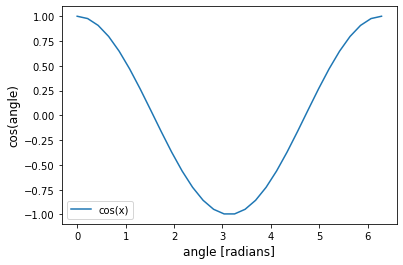

In [24]:
x = np.linspace(0, 2*np.pi, 30)
y = np.cos(x)


plt.plot(x, y, label="cos(x)")
plt.xlabel('angle [radians]', fontsize=12)
plt.ylabel('cos(angle)', fontsize=12)
plt.legend()

plt.savefig('cosx.png')
plt.close(fig)

plt.show()



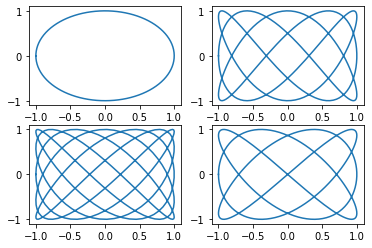

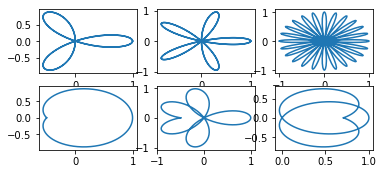

In [68]:
a = [1,3,5,3] 
b = [1,5,7,4] 
c = [3,5,12, 1/3, 7/3, 5/4]
delta = np.pi/2
t = np.linspace(-np.pi,np.pi,300)

for i in range(4):
    x = np.sin(a[i] * t + delta)
    y = np.sin(b[i] * t)
    plt.subplot(2,2,i+1)
    plt.plot(x,y)
    
plt.show()
    
for i in range(6):
    x = np.cos(c[i] * t) * np.cos(t)
    y = np.cos(c[i] * t) * np.sin(t)
    plt.subplot(3,3,i+1)
    plt.plot(x, y)

plt.show()

**Lecture de fichiers**

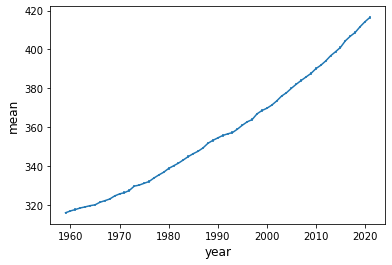

In [107]:
year = []
mean = []
unc = []

fichier = open("co2.txt", "r")
for ligne in fichier:
    if ligne[0] == '#':
        continue
    e = ligne.split()
    year.append(int(e[0]))
    mean.append(float(e[1]))
    unc.append(float(e[2]))
    
fichier.close()

unc=5*np.array(unc)

#plt.plot(year, mean)
plt.errorbar(year, mean,  yerr=unc)
plt.xlabel('year', fontsize=12)
plt.ylabel('mean', fontsize=12)

plt.show()

**Analyse d’image**

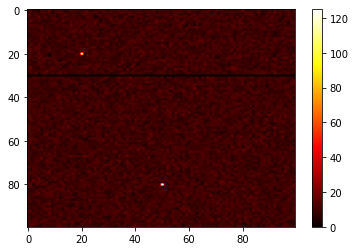

In [225]:
img = pickle.load(open('DarkCurrent.dat', 'rb'))

plt.imshow(img,aspect="auto")
plt.hot()
#plt.gray()
plt.colorbar()
plt.show()

In [238]:
moyenne = np.mean(img)
ecart = np.std(img)
print(moyenne, ecart)
print(MinMax(img))

9.908839398894944 3.1363056606062423
(125.0, 0.0)


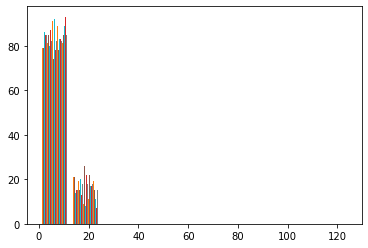

In [227]:
plt.hist(img)
plt.show()

In [228]:
for i in range(len(img)):
    for j in range(len(img[i])):
        if img[i][j] > 10*ecart:
            print(i,j, " => ", img[i][j])

20 20  =>  120.0
80 50  =>  125.0


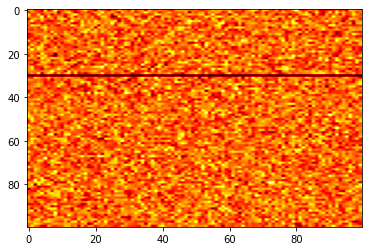

In [273]:
img2 = np.copy(img)
img2[20][20] = moyenne
img2[80][50] = moyenne

plt.imshow(img2,aspect="auto")
plt.show()

In [274]:
print(MinMax(img2))
moyenne2 = np.mean(img2)
ecart2 = np.std(img2)
print(moyenne2, ecart2)

(19.12913000797554, 0.0)
9.886321166774723 2.7017220872754795


In [275]:

for i in range(len(img2)):
    if np.mean(img2[i]) < ecart2:
        print(i)
            
for i in range(len(img)):
    img2[30][i] = moyenne2

30


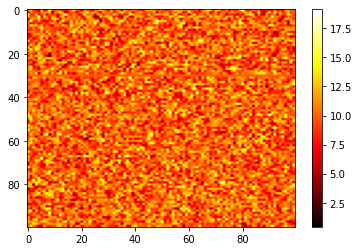

In [278]:
plt.imshow(img2,aspect="auto")
plt.colorbar()
plt.show()

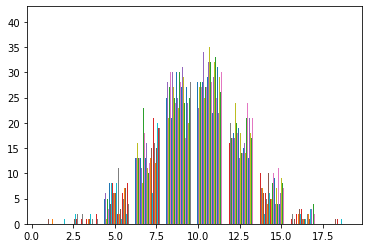

In [277]:
plt.hist(img2)
plt.show()

**FFT**

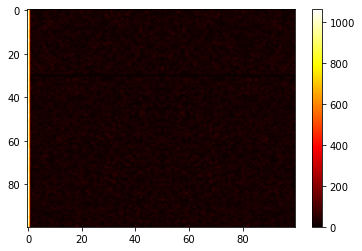

In [291]:
fft = np.fft.fft(img2)
plt.imshow(np.abs(fft),aspect="auto")
plt.colorbar()
plt.show()

In [295]:
moyenfft = np.mean(fft)
ecartfft = np.std(fft)
print(moyenfft, ecartfft)
print(MinMax(fft))

(10.149693030866493-2.7000623958883807e-17j) 102.46261719544745
((1062.6343908919962+0j), (-77.369067359053+1.7763568394002505e-15j))
